# Exploratory Data Analysis, Data Cleaning, and Model Trainging

Welcome to the 2nd part of Utilizing Artificial Intelligence for Algorithmic Trading.
For this part we will be exploring the dataset built in part 1. The code for building that data set can be found in the github.
In adition the dataset from part 1 can be found here https://drive.google.com/file/d/1HjMQ32Yu7fFwiT9b92vE60n3WDfikUsa/view?usp=drive_link.
After exploring our data we then move on to cleaning and model training. 
In the notebook we also exported our models as .joblib files to be used in our model testing, meta-models, and final streamlit web app.

This code has been built for a large scale research project for Texas State University.
The research for the project has been conducted by James Pavlicek, Jack Burt, and Andrew Hocher.
If you have any questions or inquiries feel free to reach out to me at https://www.jamespavlicek.com/ 
This code is free use and anyone can use it.

## Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re
import numpy as np 
import pandas as pd 
import nltk 

from nltk.corpus import stopwords  
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 

import re, string, unicodedata 
import contractions 
from bs4 import BeautifulSoup

import numpy as np 
import pandas as pd 
import nltk 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from joblib import dump

nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("words")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jamespavlicek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jamespavlicek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jamespavlicek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jamespavlicek/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
# Used to bypass image export issues found on MacOS.
#import matplotlib  
#matplotlib.use('Qt5Agg')
#from matplotlib import pyplot as plt

## Read Dataset

In [4]:
df = pd.read_csv("/Users/jamespavlicek/Desktop/QMST/4320/Project Final/Final_dataset.csv")


## Split to Training and Testing Datasets

In [5]:
from sklearn.model_selection import train_test_split

df, test_data = train_test_split(df, test_size=0.25, random_state=42)
test_data.to_csv("/Users/jamespavlicek/Desktop/QMST/4320/Project Final/test_data.csv", index=False)
del test_data

## Data Summary

In [6]:
df.shape

(18243, 9)

In [7]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 18243 rows and 9 columns.


In [8]:
df.head()

,Filename,Company Name,Filed As Of Date,Central Index Key,Standard Industrial Classification,Largest Text,Ticker,Percent Change (1 Week),Return Type
5195,20110523_10-K_edgar_data_1023731_0001136261-11...,8x8 inc /de/,20110523,1023731,telephone communications (no radio telephone) ...,item 7. management's discussion and analysis o...,EGHT,0.180887,Positive
24009,20230403_10-K_edgar_data_793306_0001654954-23-...,blue dolphin energy co,20230403,793306,crude petroleum & natural gas [1311],item 7. management s discussion and analysis o...,BDCO,0.033058,Positive
18299,20210208_10-K_edgar_data_872589_0001804220-21-...,"regeneron pharmaceuticals, inc.",20210208,872589,pharmaceutical preparations [2834],item 7. management's discussion and analysis o...,REGN,-0.018751,Negative
2129,20060315_10-K_edgar_data_1090425_0000950134-06...,lamar advertising co/new,20060315,1090425,services-advertising agencies [7311],item 7. management s discussion and analysis o...,LAMR,0.008754,Positive
2414,20061129_10-K_edgar_data_67887_0000950152-06-0...,moog inc,20061129,67887,misc industrial & commercial machinery & equip...,item 7. management s discussion and analysis o...,MOG-A,0.015476,Positive


In [9]:
df.tail()

,Filename,Company Name,Filed As Of Date,Central Index Key,Standard Industrial Classification,Largest Text,Ticker,Percent Change (1 Week),Return Type
21575,20230223_10-K_edgar_data_914208_0000914208-23-...,invesco ltd.,20230223,914208,investment advice [6282],item 7. management's discussion and analysis o...,IVZ,-0.011837,Negative
5390,20120229_10-K_edgar_data_203596_0001193125-12-...,wesbanco inc,20120229,203596,national commercial banks [6021],item 7. management s discussion and analysis o...,WSBC,-0.036410,Negative
860,20030311_10-K_edgar_data_728535_0001104659-03-...,hunt j b transport services inc,20030311,728535,trucking (no local) [4213],item 7. management s discussion and analysis o...,JBHT,0.133758,Positive
15795,20200326_10-K_edgar_data_1394056_0001564590-20...,"one stop systems, inc.",20200326,1394056,electronic computers [3571],item 7. management s discussion and analysis o...,OSS,-0.068966,Negative
23654,20230222_10-K_edgar_data_895126_0000895126-23-...,chesapeake energy corp,20230222,895126,crude petroleum & natural gas [1311],item 7. management s discussion and analysis o...,CHK,0.013927,Positive


In [10]:
np.random.seed(2)
df.sample(10)

,Filename,Company Name,Filed As Of Date,Central Index Key,Standard Industrial Classification,Largest Text,Ticker,Percent Change (1 Week),Return Type
12665,20180301_10-K_edgar_data_1034054_0001034054-18...,sba communications corp,20180301,1034054,real estate investment trusts [6798],item 7. management s discussion and analysis o...,SBAC,0.024587,Positive
14013,20190207_10-K_edgar_data_1413329_0001413329-19...,philip morris international inc.,20190207,1413329,cigarettes [2111],item 7. management's discussion and analysis o...,PM,0.059560,Positive
13392,20190226_10-K_edgar_data_1372020_0001564590-19...,great lakes dredge & dock corp,20190226,1372020,heavy construction other than building const -...,item 7. management's discussion and analysis o...,GLDD,0.010676,Positive
15443,20200228_10-K_edgar_data_1509589_0001509589-20...,"bonanza creek energy, inc.",20200228,1509589,crude petroleum & natural gas [1311],item 7. management s discussion and analysis o...,CIVI,0.082873,Positive
4521,20100225_10-K_edgar_data_98362_0000950123-10-0...,timken co,20100225,98362,ball & roller bearings [3562],item 7. management s discussion and analysis o...,TKR,0.034338,Positive
14364,20190214_10-K_edgar_data_1747009_0001747009-19...,equitrans midstream corp,20190214,1747009,natural gas transmission [4922],item 7. management's discussion and analysis o...,ETRN,0.014856,Positive
1586,20050606_10-K_edgar_data_1040130_0000943440-05...,petmed express inc,20050606,1040130,retail-drug stores and proprietary stores [5912],item 7. management's discussion and analysis o...,PETS,0.077027,Positive
11032,20170217_10-K_edgar_data_867773_0000867773-17-...,sunpower corp,20170217,867773,semiconductors & related devices [3674],item 7. management s discussion and analysis o...,SPWR,0.139417,Positive
6076,20130405_10-K_edgar_data_1223389_0001140361-13...,conns inc,20130405,1223389,retail-radio tv & consumer electronics stores ...,item 7. management s discussion and analysis o...,CONN,0.005947,Positive
15528,20200227_10-K_edgar_data_717423_0000717423-20-...,murphy oil corp,20200227,717423,crude petroleum & natural gas [1311],item 7. management s discussion and analysis o...,MUR,0.066292,Positive


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18243 entries, 5195 to 23654
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Filename                            18243 non-null  object 
 1   Company Name                        18243 non-null  object 
 2   Filed As Of Date                    18243 non-null  int64  
 3   Central Index Key                   18243 non-null  int64  
 4   Standard Industrial Classification  18243 non-null  object 
 5   Largest Text                        18243 non-null  object 
 6   Ticker                              18243 non-null  object 
 7   Percent Change (1 Week)             18243 non-null  float64
 8   Return Type                         18243 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()

Filename                              0
Company Name                          0
Filed As Of Date                      0
Central Index Key                     0
Standard Industrial Classification    0
Largest Text                          0
Ticker                                0
Percent Change (1 Week)               0
Return Type                           0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Filed As Of Date,18243.0,2.016307e+07,60943.358935,2.000013e+07,2.013022e+07,2.018030e+07,2.021033e+07,2.023123e+07
Central Index Key,18243.0,1.014722e+06,514968.173959,1.750000e+03,8.120740e+05,1.051470e+06,1.412408e+06,1.934850e+06
Percent Change (1 Week),18243.0,3.493795e-03,0.740179,-7.391304e-01,-3.104144e-02,-4.177780e-04,2.771466e-02,9.900000e+01


# Exploratory Data Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

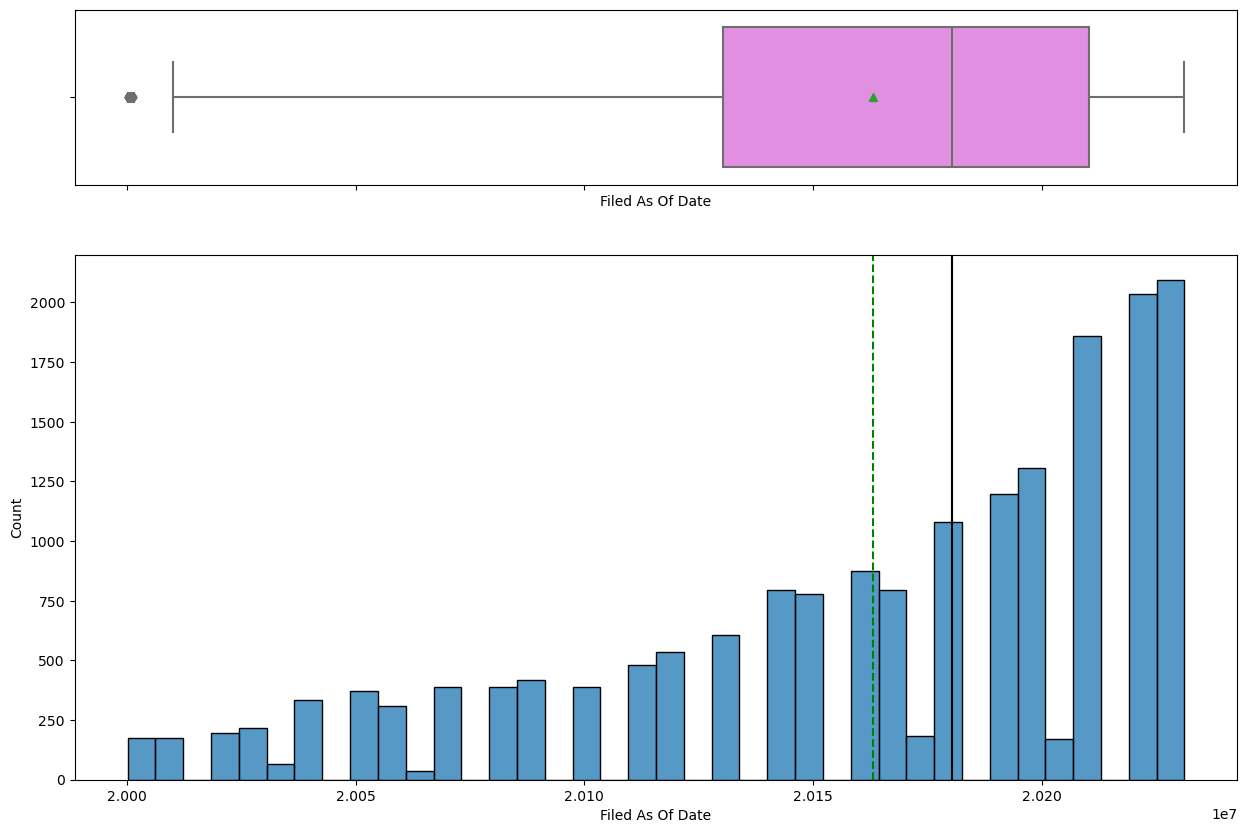

In [16]:
# Observation on Filed As Of Date
histogram_boxplot(df, "Filed As Of Date")

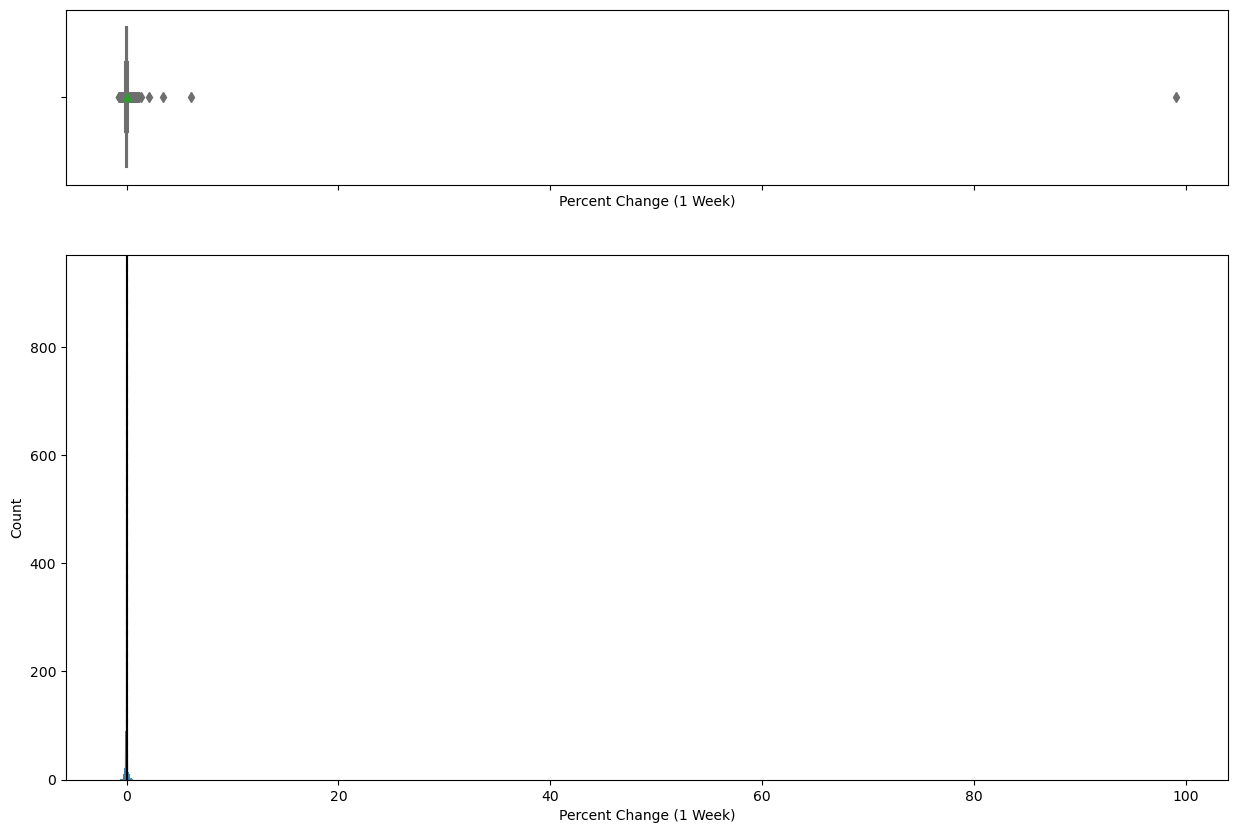

In [17]:
# Observation on Percent Change (1 Week)
histogram_boxplot(df, "Percent Change (1 Week)")

In [18]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

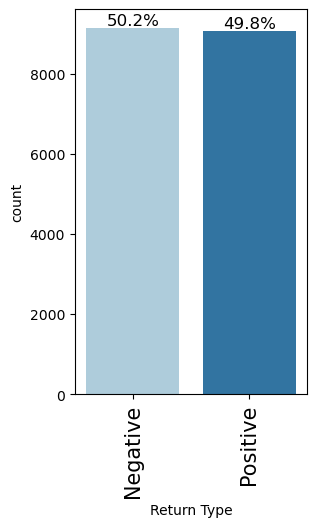

In [19]:
# Observation on Return Type (No Information Rate)
labeled_barplot(df, "Return Type", perc=True)

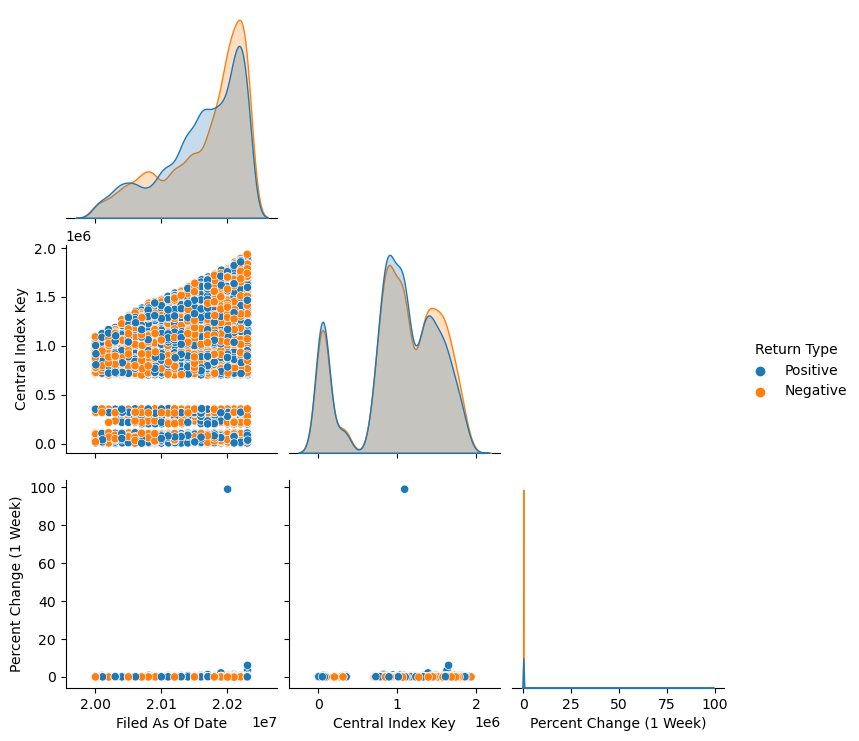

In [20]:
sns.pairplot(df, corner=True, hue="Return Type")

# Data Cleaning

## Dropping Columns

In [21]:
df.drop(
    [
        "Filename",
        "Company Name",
        "Filed As Of Date",
        "Central Index Key",
        "Percent Change (1 Week)",
        "Standard Industrial Classification",
        "Ticker"
    ],
    axis=1,
    inplace=True,
)

In [22]:
df.shape

(18243, 2)

In [23]:
df.head()

,Largest Text,Return Type
5195,item 7. management's discussion and analysis o...,Positive
24009,item 7. management s discussion and analysis o...,Positive
18299,item 7. management's discussion and analysis o...,Negative
2129,item 7. management s discussion and analysis o...,Positive
2414,item 7. management s discussion and analysis o...,Positive


## Preprocessing

### Tag Removal

In [24]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df["Largest Text"] = df["Largest Text"].apply(lambda x: strip_html(x))

df.head()

,Largest Text,Return Type
5195,item 7. management's discussion and analysis o...,Positive
24009,item 7. management s discussion and analysis o...,Positive
18299,item 7. management's discussion and analysis o...,Negative
2129,item 7. management s discussion and analysis o...,Positive
2414,item 7. management s discussion and analysis o...,Positive


### Replace Contractions 

In [25]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df["Largest Text"] = df["Largest Text"].apply(lambda x: replace_contractions(x))

df.head()

,Largest Text,Return Type
5195,item 7. management's discussion and analysis o...,Positive
24009,item 7. management s discussion and analysis o...,Positive
18299,item 7. management's discussion and analysis o...,Negative
2129,item 7. management s discussion and analysis o...,Positive
2414,item 7. management s discussion and analysis o...,Positive


### Remove Numbers/Special Characters 

In [26]:
def remove_special_characters(text, remove_digits=True):
    special = r"[^a-zA-Z0-9\s]" if not remove_digits else r"[^a-zA-z\s]"
    text = re.sub(special, "", text)
    return text

df["Largest Text"] = df["Largest Text"].apply(lambda x: remove_special_characters(x))

df.head()

,Largest Text,Return Type
5195,item managements discussion and analysis of f...,Positive
24009,item management s discussion and analysis of ...,Positive
18299,item managements discussion and analysis of f...,Negative
2129,item management s discussion and analysis of ...,Positive
2414,item management s discussion and analysis of ...,Positive


### Conversion to Lowercase 

In [27]:
def to_lowercase(text):
    """Convert all characters to lowercase"""
    lower = text.lower()
    return lower

df["Largest Text"] = df["Largest Text"].apply(lambda x: to_lowercase(x))

df.head()

,Largest Text,Return Type
5195,item managements discussion and analysis of f...,Positive
24009,item management s discussion and analysis of ...,Positive
18299,item managements discussion and analysis of f...,Negative
2129,item management s discussion and analysis of ...,Positive
2414,item management s discussion and analysis of ...,Positive


### Tokenization

In [28]:
# Ensure the text column is of type string
#df['Largest Text'] = df['Largest Text'].astype(str)

# Use apply() to tokenize each entry in the "Largest Text" column
#df['Largest Text'] = df['Largest Text'].apply(nltk.word_tokenize)

In [29]:
#New Tokenization method to help handle for scale of data
chunk_size = 1000
chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]
processed_chunks = []

for chunk in chunks:
    chunk['Largest Text'] = chunk['Largest Text'].astype(str)
    chunk['Largest Text'] = chunk['Largest Text'].apply(nltk.word_tokenize)
    processed_chunks.append(chunk)
    del chunk

df = pd.concat(processed_chunks, ignore_index=True)

In [30]:
del processed_chunks

In [31]:
#df['Largest Text'] = df['Largest Text'].astype(str)
#for index, row in df.iterrows():
    #df.at[index, "Largest Text"] = nltk.word_tokenize(row["Largest Text"])

In [32]:
df.head()

average_length = df['Largest Text'].str.len().mean()
print(average_length)

14432.462259496793


### Remove Stopwords

In [33]:
stopwords = stopwords.words("english")

customlist = [
    "not",
    "could",
    "did",
    "does",
    "had",
    "has",
    "have",
    "is",
    "ma",
    "might",
    "must",
    "need",
    "shall",
    "should",
    "was",
    "were",
    "will",
    "would",
]

stopwords = list(set(stopwords) - set(customlist))

In [35]:
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

df["Largest Text"] = df["Largest Text"].apply(lambda x: remove_stopwords(x))

df.head()

,Largest Text,Return Type
0,"[item, managements, discussion, analysis, fina...",Positive
1,"[item, management, discussion, analysis, finan...",Positive
2,"[item, managements, discussion, analysis, fina...",Negative
3,"[item, management, discussion, analysis, finan...",Positive
4,"[item, management, discussion, analysis, finan...",Positive


### Lemmatize

In [36]:
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos="v"))
    return new_words

df["Largest Text"] = df["Largest Text"].apply(lambda x: lemmatize_list(x))

df.head()

,Largest Text,Return Type
0,"[item, managements, discussion, analysis, fina...",Positive
1,"[item, management, discussion, analysis, finan...",Positive
2,"[item, managements, discussion, analysis, fina...",Negative
3,"[item, management, discussion, analysis, finan...",Positive
4,"[item, management, discussion, analysis, finan...",Positive


### Word List to Text String 

In [37]:
def join_words(words):
    return " ".join(words)

df["Largest Text"] = df["Largest Text"].apply(lambda x: join_words(x))

df.head()

,Largest Text,Return Type
0,item managements discussion analysis financial...,Positive
1,item management discussion analysis financial ...,Positive
2,item managements discussion analysis financial...,Negative
3,item management discussion analysis financial ...,Positive
4,item management discussion analysis financial ...,Positive


In [38]:
df.tail()

,Largest Text,Return Type
18238,item managements discussion analysis financial...,Negative
18239,item management discussion analysis financial ...,Negative
18240,item management discussion analysis result ope...,Positive
18241,item management discussion analysis financial ...,Negative
18242,item management discussion analysis financial ...,Positive


In [39]:
np.random.seed(2)
df.sample(10)

,Largest Text,Return Type
11808,item management discussion analysis financial ...,Positive
9155,item managements discussion analysis financial...,Positive
15013,item managements discussion analysis financial...,Positive
2597,item management discussion analysis financial ...,Positive
9643,item management discussion analysis financial ...,Positive
5385,item managements discussion analysis financial...,Positive
130,item managements discussion analysis financial...,Positive
8695,item management discussion analysis financial ...,Positive
1703,item management discussion analysis financial ...,Positive
3829,item management discussion analysis financial ...,Positive


## Encoded "Return Type" for different classification algorithms.
0 = negative
1 = positive 

In [40]:
df["Return Type"] = df["Return Type"].astype("category")
df["Return Type"] = df["Return Type"].cat.codes

df.head()

,Largest Text,Return Type
0,item managements discussion analysis financial...,1
1,item management discussion analysis financial ...,1
2,item managements discussion analysis financial...,0
3,item management discussion analysis financial ...,1
4,item management discussion analysis financial ...,1


## Vectorization

### CountVectorizer

In [41]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=4000)
data_features= bow_vec.fit_transform(df["Largest Text"])

data_features = data_features.toarray()

In [42]:
data_features.shape

(18243, 4000)

In [43]:
y1 = df["Return Type"]

In [44]:
X1 = data_features

In [45]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, stratify=y1, test_size=0.25, random_state=42
)

### TF-IDF

In [46]:
# Using TfidfVectorizer to convert text data to numbers.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=4000)
tf_data_features = vectorizer.fit_transform(df["Largest Text"])

tf_data_features = tf_data_features.toarray()

In [47]:
tf_data_features.shape

(18243, 4000)

In [48]:
y2 = df["Return Type"]

In [49]:
X2 = tf_data_features

In [50]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

#### 1 = CountVectorizer
#### 2 = TF-IDF 

# Models Training

## Random Forest on CountVectorizer 

In [51]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100, 400, 100).tolist()
base_ln

[100, 200, 300]

In [52]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b)
    scores = cross_val_score(clf, X1_train, y1_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

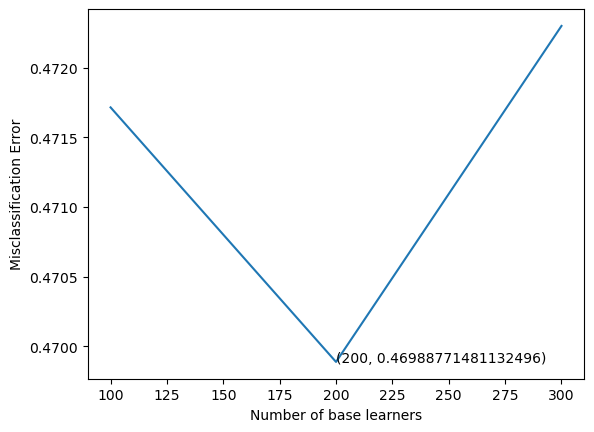

In [53]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]  
plt.plot(base_ln, error)  
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [63]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators=optimal_learners)
clf.fit(X1_train, y1_train)
clf.score(X1_test, y1_test)
count_vectorizer_predicted = clf.predict(X1_test)
print(classification_report(y1_test, count_vectorizer_predicted, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y1_test, count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55      2291
           1       0.54      0.50      0.52      2270

    accuracy                           0.54      4561
   macro avg       0.54      0.54      0.54      4561
weighted avg       0.54      0.54      0.54      4561

Accuracy of the model is :  0.5384784038588029


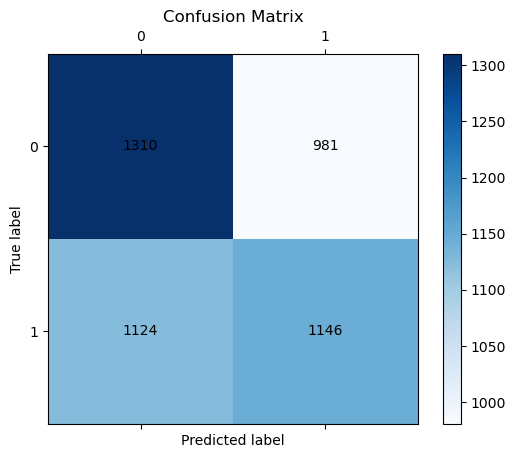

In [64]:
data_1 = confusion_matrix(y1_test, count_vectorizer_predicted)

fig, ax = plt.subplots()
cax = ax.matshow(data_1, cmap='Blues')
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(data_1):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
#Save the model
dump(clf, '/Users/jamespavlicek/Desktop/QMST/4320/Project Final/random_forest_model_countvectorizer.joblib')

['/Users/jamespavlicek/Desktop/QMST/4320/Project Final/random_forest_model_countvectorizer.joblib']

## Random Forest on TF-IDF

In [57]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100, 400, 100).tolist()
base_ln

[100, 200, 300]

In [58]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf2 = RandomForestClassifier(n_estimators=b)
    scores = cross_val_score(clf2, X2_train, y2_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

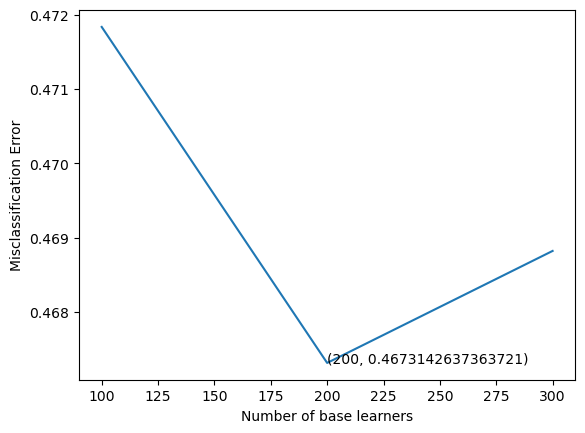

In [59]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [60]:
# Training the best model and calculating accuracy on test data .
clf2 = RandomForestClassifier(n_estimators=optimal_learners)
clf2.fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)
tf_idf_predicted = clf2.predict(X2_test)
print(classification_report(y2_test, tf_idf_predicted, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y2_test, tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1833
           1       0.54      0.51      0.53      1816

    accuracy                           0.54      3649
   macro avg       0.54      0.54      0.54      3649
weighted avg       0.54      0.54      0.54      3649

Accuracy of the model is :  0.5374075089065498


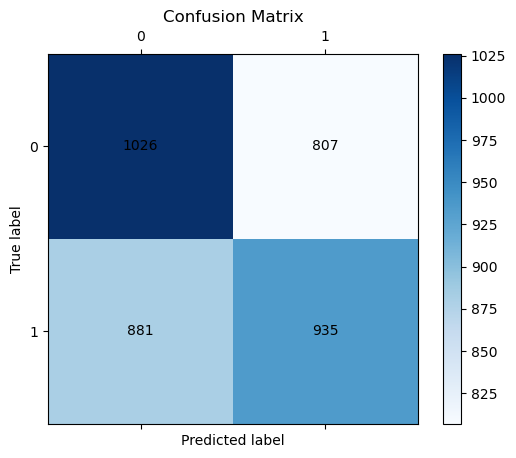

In [65]:
data_2 = confusion_matrix(y2_test, tf_idf_predicted)

fig, ax = plt.subplots()
cax = ax.matshow(data_2, cmap='Blues')
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(data_2):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
#Save the model
dump(clf2, '/Users/jamespavlicek/Desktop/QMST/4320/Project Final/random_forest_model_tf_idf.joblib')

['/Users/jamespavlicek/Desktop/QMST/4320/Project Final/random_forest_model_tf_idf.joblib']

## XGBoost on CountVectorizer 

In [67]:
# XGBoost
from xgboost import XGBClassifier

xgb1 = XGBClassifier(random_state=1, eval_metric="logloss")
xgb1.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [68]:
X1_train.shape

(13682, 4000)

In [69]:
xgb1_predicted = xgb1.predict(X1_train)
print(classification_report(y1_train, xgb1_predicted, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y1_train, xgb1_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6871
           1       0.98      0.98      0.98      6811

    accuracy                           0.98     13682
   macro avg       0.98      0.98      0.98     13682
weighted avg       0.98      0.98      0.98     13682

Accuracy of the model is :  0.9783657360035083


In [70]:
xgb1_predicted_test = xgb1.predict(X1_test)
print(classification_report(y1_test, xgb1_predicted_test, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y1_test, xgb1_predicted_test))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      2291
           1       0.54      0.54      0.54      2270

    accuracy                           0.55      4561
   macro avg       0.55      0.55      0.55      4561
weighted avg       0.55      0.55      0.55      4561

Accuracy of the model is :  0.5457136592852445


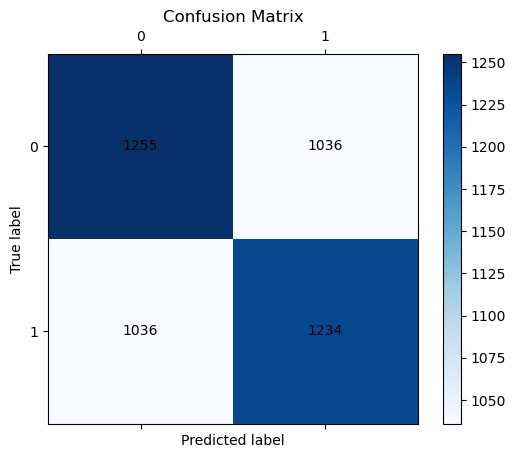

In [73]:
data_3 = confusion_matrix(y1_test, xgb1_predicted_test)

fig, ax = plt.subplots()
cax = ax.matshow(data_3, cmap='Blues')
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(data_3):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [74]:
#Save the model
dump(xgb1, '/Users/jamespavlicek/Desktop/QMST/4320/Project Final/XGBoost_model_countvectorizer.joblib')

['/Users/jamespavlicek/Desktop/QMST/4320/Project Final/XGBoost_model_countvectorizer.joblib']

## XGBoost on TF-IDF

In [75]:
xgb2 = XGBClassifier(random_state=1, eval_metric="logloss")
xgb2.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [76]:
xgb2_predicted = xgb2.predict(X2_train)
print(classification_report(y2_train, xgb2_predicted, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y2_train, xgb2_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7329
           1       0.99      0.99      0.99      7265

    accuracy                           0.99     14594
   macro avg       0.99      0.99      0.99     14594
weighted avg       0.99      0.99      0.99     14594

Accuracy of the model is :  0.9877346854871866


In [77]:
xgb2_predicted_test = xgb2.predict(X2_test)
print(classification_report(y2_test, xgb2_predicted_test, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y2_test, xgb2_predicted_test))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1833
           1       0.53      0.53      0.53      1816

    accuracy                           0.53      3649
   macro avg       0.53      0.53      0.53      3649
weighted avg       0.53      0.53      0.53      3649

Accuracy of the model is :  0.5313784598520143


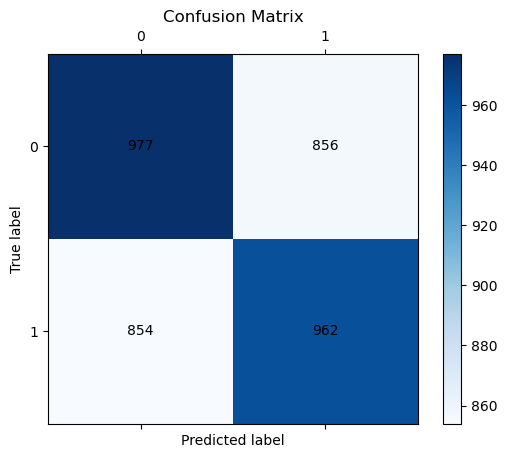

In [78]:
data_4 = confusion_matrix(y2_test, xgb2_predicted_test)

fig, ax = plt.subplots()
cax = ax.matshow(data_4, cmap='Blues')
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(data_4):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [79]:
#Save the model
dump(xgb2, '/Users/jamespavlicek/Desktop/QMST/4320/Project Final/XGBoost_model_tf_idf.joblib')

['/Users/jamespavlicek/Desktop/QMST/4320/Project Final/XGBoost_model_tf_idf.joblib']

## Naive Bayes on CountVectorizer

In [80]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X1_train, y1_train)

MultinomialNB()

In [81]:
NB_predicted = NB.predict(X1_train)
print(classification_report(y1_train, NB_predicted, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y1_train, NB_predicted))

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      6871
           1       0.55      0.60      0.57      6811

    accuracy                           0.55     13682
   macro avg       0.55      0.55      0.55     13682
weighted avg       0.55      0.55      0.55     13682

Accuracy of the model is :  0.5536471276129221


In [82]:
NB_predicted_test = NB.predict(X1_test)
print(classification_report(y1_test, NB_predicted_test, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y1_test, NB_predicted_test))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51      2291
           1       0.53      0.59      0.56      2270

    accuracy                           0.54      4561
   macro avg       0.54      0.54      0.54      4561
weighted avg       0.54      0.54      0.54      4561

Accuracy of the model is :  0.5369436527077396


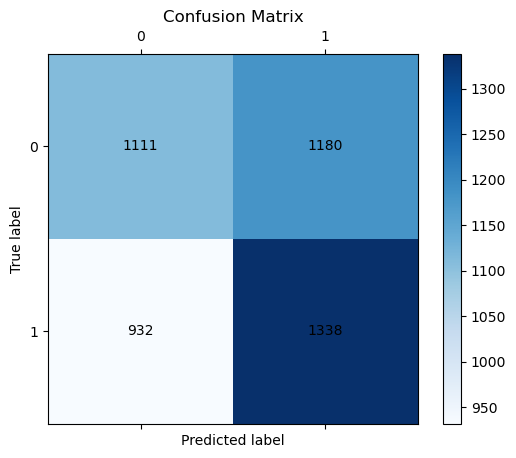

In [83]:
data_5 = confusion_matrix(y1_test, NB_predicted_test)

fig, ax = plt.subplots()
cax = ax.matshow(data_5, cmap='Blues')
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(data_5):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [84]:
#Save the model
dump(NB, '/Users/jamespavlicek/Desktop/QMST/4320/Project Final/naive_bayes_model_countvectorizer.joblib')

['/Users/jamespavlicek/Desktop/QMST/4320/Project Final/naive_bayes_model_countvectorizer.joblib']

## Naive Bayes on TF-IDF

In [85]:
NB2 = MultinomialNB()
NB2.fit(X2_train, y2_train)

MultinomialNB()

In [86]:
NB2_predicted = NB2.predict(X2_train)
print(classification_report(y2_train, NB2_predicted, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y2_train, NB2_predicted))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      7329
           1       0.56      0.57      0.57      7265

    accuracy                           0.56     14594
   macro avg       0.56      0.56      0.56     14594
weighted avg       0.56      0.56      0.56     14594

Accuracy of the model is :  0.5635877757982732


In [87]:
NB2_predicted_test = NB2.predict(X2_test)
print(classification_report(y2_test, NB2_predicted_test, target_names=["0", "1"]))
print("Accuracy of the model is : ", accuracy_score(y2_test, NB2_predicted_test))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      1833
           1       0.53      0.54      0.54      1816

    accuracy                           0.54      3649
   macro avg       0.54      0.54      0.54      3649
weighted avg       0.54      0.54      0.54      3649

Accuracy of the model is :  0.5368594135379556


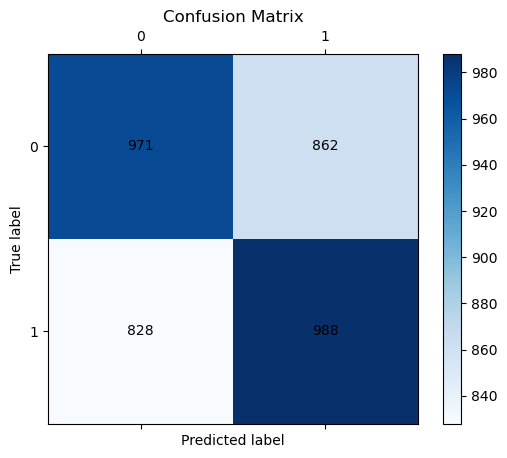

In [88]:
data_5 = confusion_matrix(y2_test, NB2_predicted_test)

fig, ax = plt.subplots()
cax = ax.matshow(data_5, cmap='Blues')
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(data_5):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [89]:
X2_train.shape

(14594, 4000)

In [90]:
#Save the model
dump(NB2, '/Users/jamespavlicek/Desktop/QMST/4320/Project Final/naive_bayes_model_tf_idf.joblib')

['/Users/jamespavlicek/Desktop/QMST/4320/Project Final/naive_bayes_model_tf_idf.joblib']

In [91]:
frequency = df["Return Type"].value_counts()

print(frequency)

Return Type
0    9162
1    9081
Name: count, dtype: int64


In [92]:
no_information_rate = 9162/18243

print(no_information_rate)

0.5022200296003947
